In [1]:
import os
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
def fetch(id):
    print('-' * 80)
    print(id)
    path = fifs[fifs['id'] == id]['rawica'].values[0]
    print(path)
    return path
fifs = pd.read_json('fifs.json')
fifs

,id,rawpath,rawica
0,QYJ_Test_1,rawdata/QYJ/MultiTest_1_raw_tsss.fif,raw_ica/QYJ_Test_1-afterica-raw.fif
1,QYJ_Test_2,rawdata/QYJ/MultiTest_2_raw_tsss.fif,raw_ica/QYJ_Test_2-afterica-raw.fif
2,QYJ_Test_3,rawdata/QYJ/MultiTest_3_raw_tsss.fif,raw_ica/QYJ_Test_3-afterica-raw.fif
3,QYJ_Test_4,rawdata/QYJ/MultiTest_4_raw_tsss.fif,raw_ica/QYJ_Test_4-afterica-raw.fif
4,QYJ_Test_5,rawdata/QYJ/MultiTest_5_raw_tsss.fif,raw_ica/QYJ_Test_5-afterica-raw.fif
5,QYJ_Test_6,rawdata/QYJ/MultiTest_6_raw_tsss.fif,raw_ica/QYJ_Test_6-afterica-raw.fif
6,QYJ_Test_7,rawdata/QYJ/MultiTest_7_raw_tsss.fif,raw_ica/QYJ_Test_7-afterica-raw.fif
7,QYJ_Test_8,rawdata/QYJ/MultiTest_8_raw_tsss.fif,raw_ica/QYJ_Test_8-afterica-raw.fif
8,QYJ_Training_1,rawdata/QYJ/MultiTraining_1_raw_tsss.fif,raw_ica/QYJ_Training_1-afterica-raw.fif
9,QYJ_Training_2,rawdata/QYJ/MultiTraining_2_raw_tsss.fif,raw_ica/QYJ_Training_2-afterica-raw.fif


In [9]:
tmin, tmax = -0.2, 1.0
raw = mne.concatenate_raws([mne.io.read_raw_fif(fetch('ZYF_Training_{}'.format(j))) for j in [2, 4]])
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, baseline=(tmin, 0), tmin=tmin, tmax=tmax, decim=10)
event_id = epochs.event_id

--------------------------------------------------------------------------------
ZYF_Training_2
raw_ica/ZYF_Training_2-afterica-raw.fif
Opening raw data file raw_ica/ZYF_Training_2-afterica-raw.fif...
    Range : 8000 ... 226999 =      8.000 ...   226.999 secs
Ready.
Current compensation grade : 0
--------------------------------------------------------------------------------
ZYF_Training_4
raw_ica/ZYF_Training_4-afterica-raw.fif
Opening raw data file raw_ica/ZYF_Training_4-afterica-raw.fif...
    Range : 10000 ... 228999 =     10.000 ...   228.999 secs
Ready.
Current compensation grade : 0
148 events found
Event IDs: [ 2  6  9 11 14 17 19 33 35]
148 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


<ipython-input-9-18595a2f1f6a>:4: RuntimeWarning: The measurement information indicates a low-pass frequency of 330 Hz. The decim=10 parameter will result in a sampling frequency of 100 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, events, baseline=(tmin, 0), tmin=tmin, tmax=tmax, decim=10)


2
Loading data for 24 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    3.1s


Multiple channel types selected, returning one figure per type.


[Parallel(n_jobs=64)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.8s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
6
Loading data for 24 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    3.2s


Multiple channel types selected, returning one figure per type.


[Parallel(n_jobs=64)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.9s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
9
Loading data for 24 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    3.0s


Multiple channel types selected, returning one figure per type.


[Parallel(n_jobs=64)]: Done 224 tasks      | elapsed:    3.6s
[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.7s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
11
Loading data for 2 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    3.0s


Multiple channel types selected, returning one figure per type.


[Parallel(n_jobs=64)]: Done 224 tasks      | elapsed:    3.4s
[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.5s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
14
Loading data for 24 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    3.1s


Multiple channel types selected, returning one figure per type.


[Parallel(n_jobs=64)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.9s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
17
Loading data for 24 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    3.0s


Multiple channel types selected, returning one figure per type.


[Parallel(n_jobs=64)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.8s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
19
Loading data for 1 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    2.9s


Multiple channel types selected, returning one figure per type.
Applying baseline correction (mode: mean)


[Parallel(n_jobs=64)]: Done 243 out of 306 | elapsed:    3.3s remaining:    0.8s
[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.3s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
33
Loading data for 24 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    3.2s


Multiple channel types selected, returning one figure per type.


[Parallel(n_jobs=64)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.9s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
35
Loading data for 1 events and 1201 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    3.0s


Multiple channel types selected, returning one figure per type.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


[Parallel(n_jobs=64)]: Done 306 out of 306 | elapsed:    3.3s finished


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


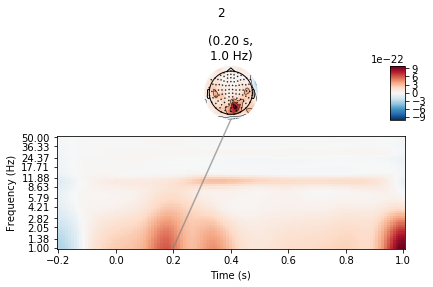

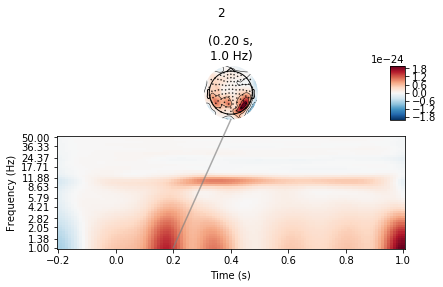

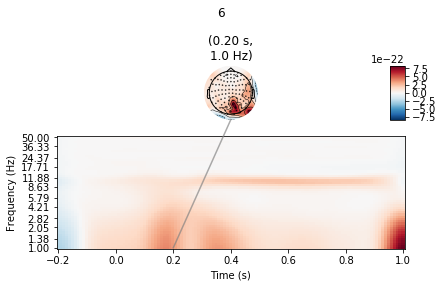

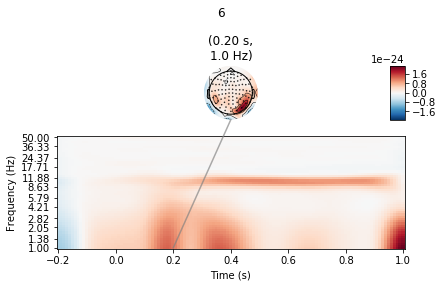

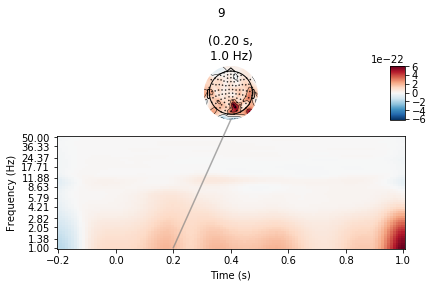

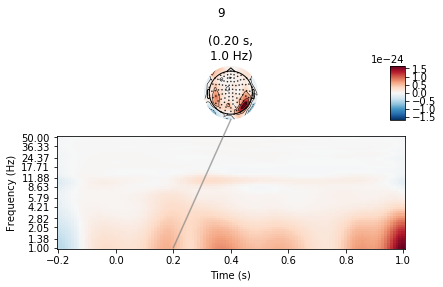

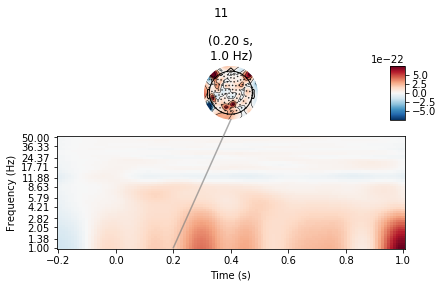

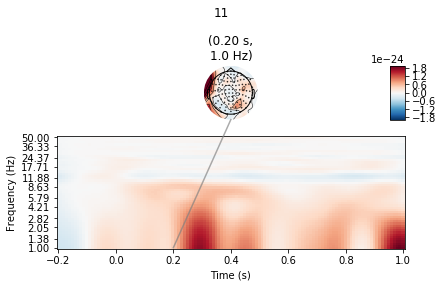

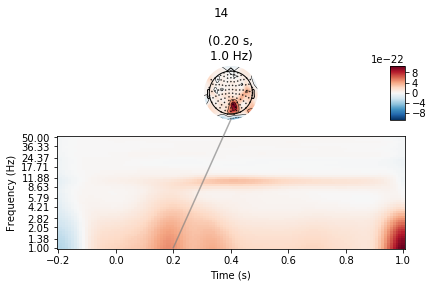

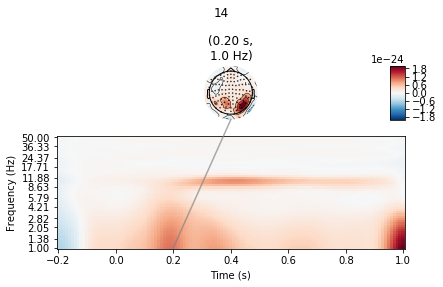

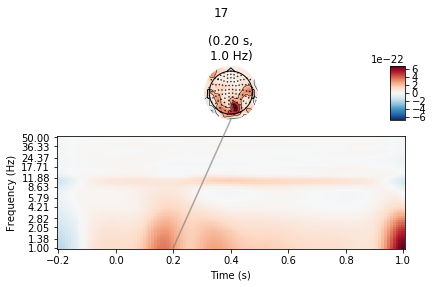

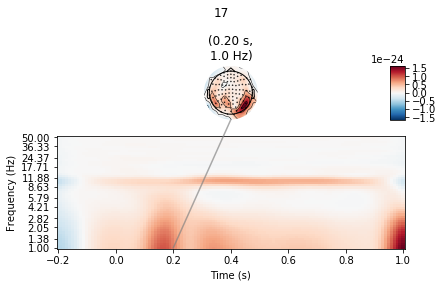

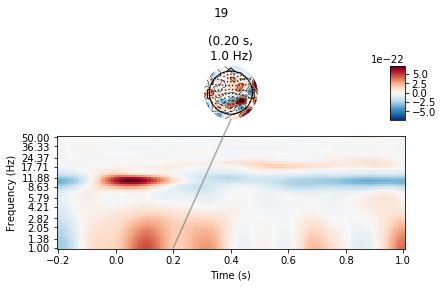

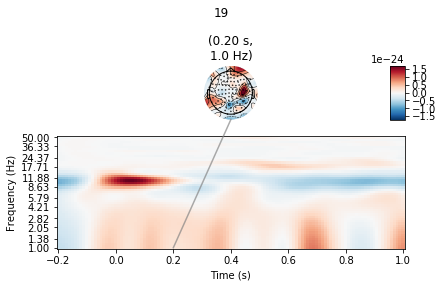

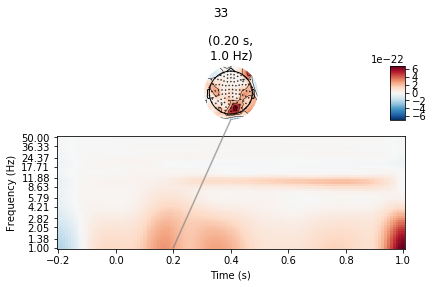

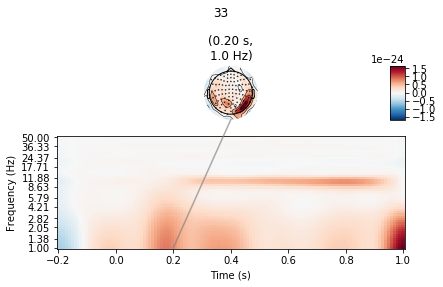

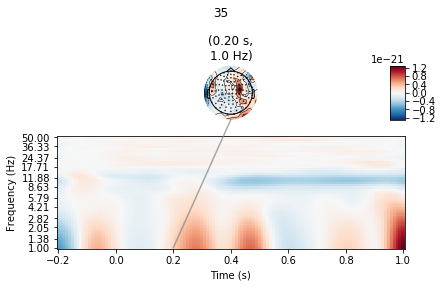

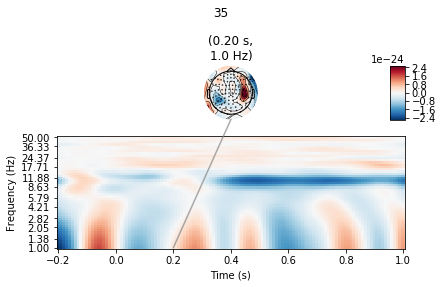

In [11]:
n_jobs = 64
tfr_morlet = mne.time_frequency.tfr_morlet
freqs = np.logspace(*np.log10([1, 50]), num=50)
n_cycles = freqs / 2
for event in event_id:
    print(event)
    power, itc = tfr_morlet(epochs[event], freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, n_jobs=n_jobs)
    power.plot_joint(title=event, timefreqs=[(0.2, 1)], baseline=(tmin, 0), tmin=tmin, tmax=tmax, mode='mean')